STEP 1-IMPORTING THE LIBRARIES INTO THE WORKSPACE

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sbs
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats


STEP 2-IMPORTING THE DATASET INTO WORKSPACE

In [ ]:
pr=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
pr.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


DESCRIBING THE DATA

In [ ]:
pr.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


PLOTTING THE DISTRIBUTION OF DATA(SCORES) IN 2D GRAPH

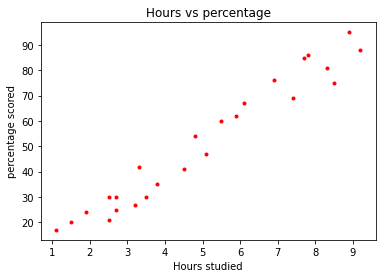

In [ ]:
#plotting the distribution of scores
plt.title('Hours vs percentage')
plt.xlabel('Hours studied')
plt.ylabel('percentage scored')
plt.scatter(pr.Hours,pr.Scores,color='Red',marker='.')

From the above graph we can state that there is positive relationship between the hours studied and the percentage scored

In [ ]:
pr.shape

(25, 2)

DATA PREPARATION

Taking x as the input variable 
Taking y as the target variable

In [ ]:
x=pr.iloc[:,:-1].values
y=pr.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split  #we use train_test_spilt because we cant train a model on a single data set even if we train we dont know its performance

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=1)

Completing the training of the data

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print("Training complete")

Training complete


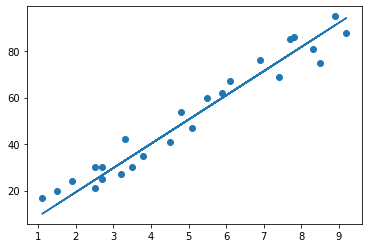

In [ ]:
line=regressor.coef_*x+regressor.intercept_
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

In [ ]:
print(x_test)  #testing data in hours
y_pred=regressor.predict(x_test) #prediciting the scores

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]
 [7.7]
 [6.1]
 [7.4]]


In [ ]:
#comparing the actual output values for x-test withpredicted values
pr = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
pr

,Actual,Predicted
0,17,9.939530
1,42,32.843201
2,24,18.268138
3,75,86.979152
4,54,48.459341
5,85,78.650544
6,67,61.993329
7,69,75.527316


In [ ]:
#testing with our own data
hours=9.25
test=np.array([hours])
test=test.reshape(-1,1)
own_pred=regressor.predict(test)
print("No of hours = {}".format(hours))
print("Predicted scores = {}".format(own_pred[0]))

No of hours = 9.25
Predicted scores = 94.78722212956563


In [ ]:
#evalvuating the model
from sklearn import metrics
print('Mean absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))

Mean absolute Error:  7.169048271425507


if a student studies 9.25 hours per day the model predicts the 94 percent of the score